# Visulization of the training and inference results

In [1]:
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from param import *

os.chdir("/work")
output_dir = ParamDir().OUTPUT_DIR
datalist = ParamDir().data_path_list


## coordinates and fiited coefficients visualization

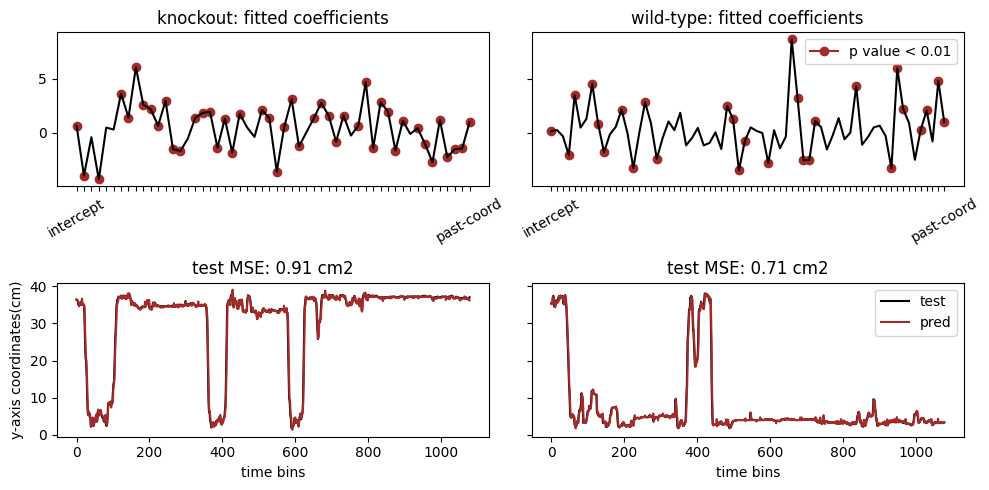

In [8]:
conf_level = .01
fig, axes = plt.subplots(nrows = 2,ncols = 2, sharey='row', figsize = (10,5), tight_layout = True)
for m_id, data_dir in enumerate(datalist[[0,2]]):
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    for result in eval_results_all:
        if result["coord_axis"] == "y-axis" and result["nthist"] == 1:
            # fitted parameters with p_value<.1
            axes[0][m_id].plot(result["fitted_param"], c = "black")
            labels = axes[0][m_id].get_xticks().tolist()
            xx = np.arange(len(result["fitted_param"]))
            for ii, p_value in enumerate(result['coeff_p_values']):
                if (p_value < conf_level) or ((1 - p_value) < conf_level):
                    axes[0][m_id].scatter(xx[ii], result["fitted_param"][ii], c="brown")
            labels = [''] * len(result["fitted_param"])
            labels[0], labels[-1] = "intercept", "past-coord"
            axes[0][m_id].set_xticks(xx, labels, rotation=30)
            axes[0][m_id].set_title(f"{mouse_type}: fitted coefficients")

            # coordinate
            axes[1][m_id].plot(result["y_test"]/5, c = "black", label="test")
            axes[1][m_id].plot(result["y_pred"]/5, c = "brown", label="pred")

            test_scores = result["eval_test_scores"]/25
            axes[1][m_id].set_title(f"test MSE: {test_scores:.2f} cm2")
            axes[1][m_id].set_xlabel("time bins")
        

plt.legend()
tmp = result["coord_axis"]
axes[1][0].set_ylabel(f"{tmp} coordinates(cm)")
legend_elements = [Line2D([0], [0], marker='o', c="brown", label=f"p value < {conf_level}")]
axes[0][1].legend(handles=legend_elements)
plt.suptitle()